---
Stellen Sie bitte sicher, dass alles wie vorhergesehen läuft, bevor Sie dieses Übungsblatt abgeben. **Starten Sie den Kernel neu** (in der Menüleiste die Option Kernel$\rightarrow$Restart auswählen) und **validieren** Sie anschließend das Übungsblatt (in der Menüleiste auf Validate klicken) um Rückmeldung zu eventuellen fehlenden oder fehlerhaften Eingaben zu erhalten. 

Füllen Sie alle Stellen im Übungsblatt aus, welche entweder `DEIN CODE HIER` oder "DEINE ANTWORT HIER" enthalten. Geben Sie unterhalb Ihren vollständigen Namen an.

Wenn Sie Code-Bestandteile aus anderen Quellen (wie z.B. Stackoverflow) kopieren, dann machen sie den kopierten Code in ihrer Quellcodedatei kenntlich und fügen eine Referenz auf die Quelle als Kommentar hinzu.

Wenn Sie die Aufgaben in einer Gruppe erledigen, dann fügen Sie die Namen aller Gruppenmitglieder in der nachfolgende Zelle zu `Name` und zusätzlich als Kommentar am Anfang Ihrer Quellcodedatei hinzu.

---

In [ ]:
NAME = ""

---

<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="width: 240px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Methoden der Softwareentwicklung II</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>SS 2024</b></font></div>
        </td>
    </tr>
</table>

----
# Übungsblatt 6


------
Abgabe bis <b>Sonntag, 12.Mai 2024, 23:55 Uhr</b>

In [ ]:
import jagl
import os
import shutil
import re

# Klausur vom letztem Jahr: Roboter


## Allgemeine Hinweise

* Es sind alle Unterlagen (Foliensätze, Skripten) erlaubt, Sie dürfen auch Teile Ihrer eigenen Lösungen der Übungsblätter wiederverwenden. 
* Kommunikation mit anderen Studenten und/oder KIs (ChatGPT & Co.) ist in jeglicher Form verboten und führt zu einer negativen Beurteilung.
* Lesen Sie die Aufgabe genau und vollständig durch, bevor Sie mit der Bearbeitung beginnen.
* Zur Benotung wird die Funktionalität ihrer Lösung auf JupyterHub herangezogen.
* Kommentieren Sie Ihren Code ausführlich (jede Funktion und auch jeden wichtigen Codeteil)
* Kommentieren Sie am Anfang Ihrer Quelldatei, was an Ihrem abgegebenen Programm einwandfrei funktioniert, und was nicht funktioniert (und warum).
* Wann immer von „zufälligen“ Werten gesprochen wird, grenzen Sie den möglichen Wertebereich sinnvoll ein.
* Wenn keine konkreten Werte angegeben werden, dann wählen Sie selber einen sinnvollen Wert aus.


## Aufgabe

Es soll die Steuersoftware eines Roboters programmiert werden. Dieser Roboter besitzt einen Motor, der für die Fortbewegung sorgen, und mehrere verschiedene Sensoren, die auf Hindernisse und Gefahren in der Umgebung achten. Wenn ein Hindernis oder eine Gefahr erkannt wurde, dann sollen der MMotor je nach Schwere der Gefahr entweder langsamer laufen oder sofort gestoppt werden.

Das Herzstück der Steuerungssoftware ist die sog. Event-Loop. Diese ist eine Endlosschleife, die ständig die Sensoren abfrägt (d.h. die `checkSensor()`-Funktion der Sensoren aufruft) und je nach Rückgabewert der Sensoren die Geschwindigkeit der Motoren steuert.


## Ablauf Event-Loop

Die Event-Loop fragt ständig in einer Endlosschleife den Status der Sensoren ab. Die Rückgabewerte der Sensoren ist eine Zahl zwischen 0 und 100, je nach Schwere der entdeckten Gefahr (0 bedeutet keine Gefahr und 100 bedeutet sehr große Gefahr). Nachdem alle Sensoren abgefragt wurden, wird der höchste gemeldete Gefahrenlevel verwendet um die Geschwindigkeit des Motors zu setzen. Zum Beispiel, bei keiner gemeldeten Gefahr kann der Roboter sich mit voller Geschwindigkeit bewegen und beim höchsten Gefahrenlevel nur mit niedrigster Geschwindkeit. 

Wenn ein Sensor eine `CriticalDangerException` wirft, dann soll sofort (d.h. das Abfragen der weiteren Sensoren wird an dieser Stelle unterbrochen) ein Notstopp der Motoren eingeleitet werden. Nach 3 Iterationen der Event-Loop soll dann wieder zum Normalzustand zurückgekehrt werden.

Wenn einer der Sensoren eine `InternalErrorException` wirft, dann soll aus Sicherheitsgründen auf die niedrigste Geschwindigkeit geschalten werden. Die niedrigste Geschwindigkeit soll so lange aufrechterhalten werden, bis der Sensor erfolgreich mit `reset()` zurückgesetzt werden konnte (`reset()` wird für jeden fehlerhaften Sensor nur einmal pro Iteration ausgeführt). Bei Geschwindigkeitsreduktion augrund interner Sensorfehler kann es aber immer noch zur Notabschaltung aufgrund kritischer Gefahr kommen!

Lassen Sie aus praktischen Gründen nach jeder Iteration die Event-Loop eine Sekunde schlafen (mittels [`sleep()`](https://man7.org/linux/man-pages/man3/sleep.3.html)). Verwenden Sie ausserdem aus praktischen Gründen (um die Korrektur der Klausur zu erleichtern) keine echte Endlosschleife. Stattdessen soll **nach 30 Iterationen die "Endlosschleife" beendet werden**.


## Grundlegende Softwarearchitektur

Die grundlegende Software-Architektur schaut folgendermaßen aus:

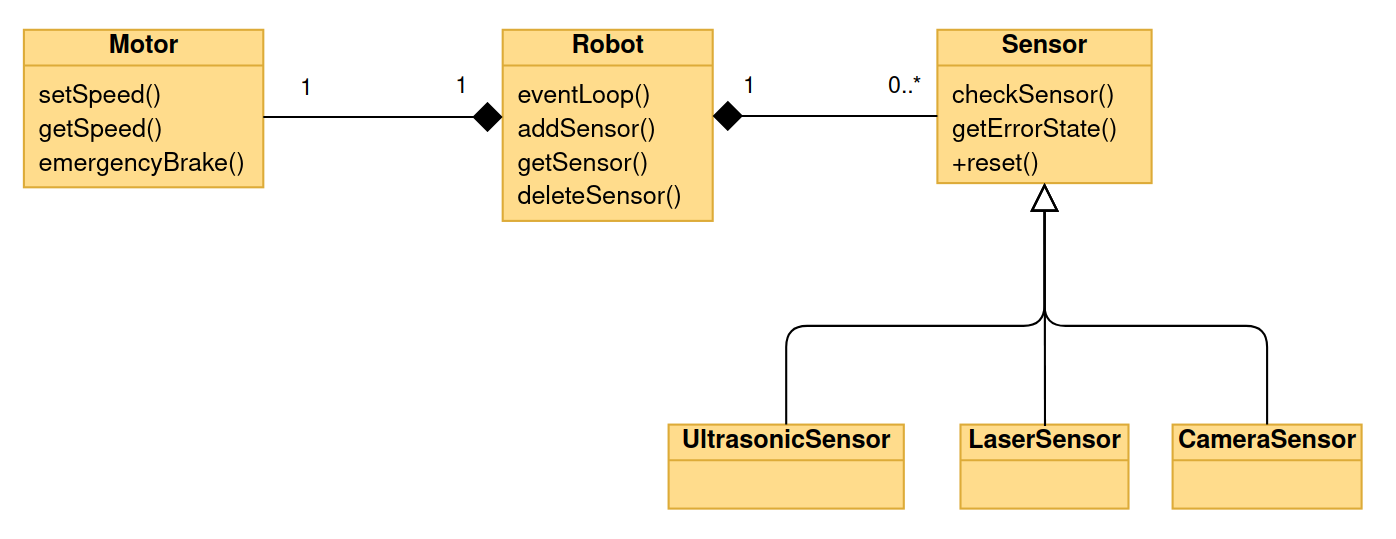


## Public Interface

Das im folgenden gegebene öffentliche Interface soll genauso wie angegebene implementiert werden. Sie können dieses auch um weitere Funktionen erweitern, wenn Sie dies für nötig erachten.

### Klasse Robot 

Die Klasse `Robot` repräsentiert den Roboter selber und implementiert die zentrale Steuerung des Roboters. Sie verwaltet die Motoren und die Sensoren, d.h. sie übernimmt für diese die Object Ownership. Es gibt genau einen Motor, diesen können Sie statisch zur Klasse hinzufügen (als Objektvariable). Die Sensorkonfiguration hingegen ist ständigen Änderungen unterworfen, daher benötigen Sie für deren Verwaltung einen dynamische Datencontainer.

* Objektfunktionen:
    * `int addSensor(Sensor* sensor)`: Fügt einen neuen Sensor zum Roboter hinzu. Der Rückgabewert ist eine ID, die den jeweiligen Sensor eindeutig identifiziert.
    * `Sensor* getSensor(int id)`: Gibt den Sensor mit der angegebenen ID zurück.
    * `void deleteSensor(int id)`: Entfernt den Sensor mit der angegebenen ID und gibt alle damit verbundenen Ressourcen wieder frei.
    * `void eventLoop()`: Diese Funktion ist das Herzstück der Steuerung, welche in einer Endlosschleife ständig den Status der Sensoren abfrägt und je nach Rückgabewert die Geschwindigkeit der Motoren einstellt.
    

### Klasse Sensor 

Die Klasse `Sensor` ist die Oberklasse aller Sensoren und definiert deren öffentliches Interface.
    
* Objektfunktionen:
    * `int checkSensor()`: Überprüft den Status des Sensors und gibt eine positive Zahl zwischen 0 und 100 zurück, die die Einschätzung des Sensors bezüglich Gefahren in der Umgebung repräsentiert. 0 bedeutet keine Gefahr und 100 bedeutet sehr große Gefahr. Wenn eine kritische Gefahr droht (z.B. ein unmittelbarer Zusammenstoß mit einem Hindernis), dann soll eine `CriticalDangerException` geworfen werden. Wenn es zu einer Fehlfunktion des Sensors kommt, dann soll eine `InternalErrorException` geworfen werden.
    * `bool getErrorState()`: Wenn es zu einer Fehlfunktion des Sensors kommt, dann gibt diese Funktion so lange `true` zurück, bis der Sensor erfolgreich mit `reset()` zurückgesetzt wurde.
    * `void reset()`: Nachdem ein Sensor einen internen Fehler gemeldet hat, kann diese Funktion verwendet werden, um den Sensor zurückzusetzen. Hat eine vom Sensortyp abhängige Wahrscheinlichkeit, den Sensor erfolgreich zurückzusetzen. Wenn das Zurücksetzen nicht funktioniert hat, dann soll eine `InternalErrorException` geworfen werden.

### Konkrete Sensoren

Es gibt drei konkrete Sensoren:

* Ultraschallsensor (UltrasonicSensor)
    * Kann nur Gefahrenlevels zwischen 0 und 60 melden (wird zufällig ausgewählt)
    * Hat eine 10% Wahrscheinlichkeit eine `CriticalDangerException` zu werfen.
    * Hat eine 20% Wahrscheinlichkeit eine `InternalErrorException` zu werfen.
    * Hat eine 60% Wahrscheinlichkeit, dass der Sensor mittels `reset()` erfolgreich zurückgesetzt wird.
* Lasersensor (LaserSensor)
    * Kann nur Gefahrenlevels zwischen 0 und 80 melden (wird zufällig ausgewählt)
    * Hat eine 20% Wahrscheinlichkeit eine `CriticalDangerException` zu werfen.
    * Hat eine 10% Wahrscheinlichkeit eine `InternalErrorException` zu werfen.
    * Hat eine 50% Wahrscheinlichkeit, dass der Sensor mittels `reset()` erfolgreich zurückgesetzt wird.
* Kamerasensor (CameraSensor)
    * Kann Gefahrenlevels zwischen 0 und 100 melden (wird zufällig ausgewählt)
    * Hat eine 25% Wahrscheinlichkeit eine `CriticalDangerException` zu werfen.
    * Hat eine 20% Wahrscheinlichkeit eine `InternalErrorException` zu werfen.
    * Hat eine 40% Wahrscheinlichkeit, dass der Sensor mittels `reset()` erfolgreich zurückgesetzt wird.

### Klasse Motor 

Die Klasse `Motor` repräsentiert den Motor.
    
* Objektfunktionen:
    * `void setSpeed(int speed)`: Setzt die Motorgeschwindigkeit. Muss eine positive Zahl zwischen 0 und 10 sein. 0 bedeutet Motorenstop und 10 bedeutet volle Geschwindigkeit.
    * `int getSpeed()`: Gibt die aktuelle Geschwindigkeit zurück.
    * `void emergencyBrake`: Führt einen Notstopp der Motoren durch. Setzt die Geschwindigkeit auf 0.

### Exceptions

Die Basisklasse aller Exceptions soll `RobotException` heißen, die wiederum von `std::exception` erbt. Überschreiben Sie die Funktion `const char* what()` der Klasse `std::exception`, sodass eine aussagekräftige Fehlermeldung zurückgegeben wird (alternativ können Sie auch von `std::runtime_error` erben und die Fehlermeldung dessen Konstruktor übergeben).

Wenn Sie es für notwendig erachten, können Sie auch weitere benutzerdefinierte Exception-Klassen neben den schon oben genannten hinzufügen.

## Interne Implementierung

Wie Sie die gewünschte Funktionalität intern implementieren, bleibt Ihnen überlassen. Wählen Sie passende Sichtbarkeiten und vergessen Sie nicht, wenn möglich das `const` Keyword bei Eingabeparametern und wenn passend Call-by-Reference zu verwenden.

Wählen Sie selbstständig passende Datencontainer aus. Es darf zu keinem Zeitpunkt zu einem Speicher- oder sonstigen Ressourcenleck kommen.

Überlegen Sie sich außerdem, wo sie dynamische Bindung verwenden.

Separieren Sie bitte die `main()` Funktion in einer eigenen Datei, die Sie `main.cpp` nennen. Der Hintergrund ist, dass die automatischen Tests ihre eigene `main()` Funktion verwenden, daher muss diese einfach austauschbar sein. Der Inhalt ihrer `main()`-Funktion ist für die Prüfung nicht relevant.

Die restlichen Dateien können Sie benennen, wie Sie wollen. Benennen Sie aber die Klassen und Funktionen genauso wie angegeben!

Geben Sie mit der Abgabe auch ein Makefile ab, welches Ihr Programm kompiliert.


## Unverbindliche Schritt-für-Schritt Anleitung

1. Beginnen Sie mit der Implementierung der Klasse `Motor`. Testen Sie diese ausführlich.
1. Beginnen Sie mit der Implementierung der Klasse `Sensor` und deren Subklassen. Testen Sie diese ausführlich.
3. Implementieren Sie anschließend die Klasse `Robot` und testen diese ausführlich.

In [ ]:

# new test suite
jagl.testsuite_begin("Übungszettel 6")

# delete all build artifacts
_ = jagl.remove_paths(files=["factory", "*.o"])



In [ ]:
%%bash
#
# Kopieren Sie vor der Abgabe ihr Makefile und Ihre Quellcodedatein in dasselbe Verzeichnis, 
# in dem dieser Übungszettel zu finden ist.
#
# Der Name der ausführbaren Datei sollte 'factory' lauten.
#

make

In [ ]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_6_1_solved = False

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_1_1(result, suite, case):
    varname = "exercise_6_1_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Check Makefile", deps=["1"])
def testcase_1_2(result, suite, case):
    result.setSucceeded()
    jagl.check_path_exists(result, files=["Makefile"], message = "Are you sure that you uploaded a Makefile and named it \"Makefile\"?")
    if result.isSucceeded():
        result.addMessage("Makefile was found.")

In [ ]:
@jagl.testcase("3", desc="Building program", deps=["2"])
def testcase_1_3(result, suite, case):
    progname = "robot"
    if os.path.isfile(progname) or os.path.isfile("factory"):
        result.setSucceeded("The program could be build successfully.")
        
    else:
        res = jagl.exec_bin("make")
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(progname) or os.path.isfile("factory"):
                    result.setSucceeded("The program could be build successfully.")
                else:
                    result.setFailed("make was executed successfully, but I couldn't find an executable (Did your name your executable '" + progname + "'?).")
                if len(stderr) > 0:
                    result.setFailed(["However, there were errors."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be build:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("make could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling make. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed('Unknown error during execution of make: ' + str(res.error) + " Please inform your course instructor.")

In [ ]:
@jagl.testcase("4", desc="Executing program", deps=["3"])
def testcase_1_4(result, suite, case):
    if os.path.isfile("factory"):
        progname = "factory"
    else:
        progname = "robot"
    execresult = jagl.exec_bin("./" + progname, [], timeout = 60)
    jagl.check_execution_result(result, execresult, checkExitCode = True)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")

In [ ]:
#try:
#    shutil.move("main.cpp.bak", "main.cpp")
#except:
#    pass